# Netflix Dataset Analysis 

### The Netflix dataset used in this project  is on TV shows and Movies available on Netflix in November 2021.The dataset is available at https://www.kaggle.com/shivamb/netflix-shows and is updated every month. The aim of this project is to analysis this dataset.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_c636fc76e81e44bd8261ef4e4e5bb742 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_c636fc76e81e44bd8261ef4e4e5bb742 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_c636fc76e81e44bd8261ef4e4e5bb742 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5o-IB_TpMMAtR6B9PaOwCg4eR378tHnKZggzFNqxW1Ws',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_c636fc76e81e44bd8261ef4e4e5bb742)

body = client_c636fc76e81e44bd8261ef4e4e5bb742.get_object(Bucket='notebook1-donotdelete-pr-qetnhkiaaiytzr',Key='Netflix.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.columns = [x.capitalize() for x in data.columns] # To capitilise the first letter of each column name.



In [595]:
data.head()

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [596]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_id       8807 non-null   object
 1   Type          8807 non-null   object
 2   Title         8807 non-null   object
 3   Director      6173 non-null   object
 4   Cast          7982 non-null   object
 5   Country       7976 non-null   object
 6   Date_added    8797 non-null   object
 7   Release_year  8807 non-null   int64 
 8   Rating        8803 non-null   object
 9   Duration      8804 non-null   object
 10  Listed_in     8807 non-null   object
 11  Description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Check for duplicate records in the dataset

In [597]:
data[data.duplicated()]

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description


#### We find the dataset does not contain any duplicates. If we did find duplicates we can permanently remove them will the following code: data.droup_duplicates(inplace=True)

### Check for null values in the dataset 

In [598]:
data.isnull().sum()                            # This tells us the number of Null values in each column of the dataset

Show_id            0
Type               0
Title              0
Director        2634
Cast             825
Country          831
Date_added        10
Release_year       0
Rating             4
Duration           3
Listed_in          0
Description        0
dtype: int64

<AxesSubplot:>

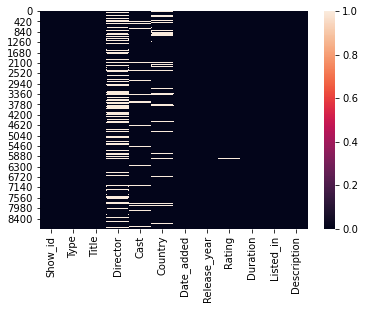

In [236]:
sns.heatmap(data.isnull())     # This heatmap is of the number of Null values in each column of the dataset

In [240]:
for i in data.columns:
    null_rate = (data[i].isnull().sum())/ data.shape[0] * 100
    if null_rate >0:
        print('The Null rate for {} is  {:,.2f} %'.format(i,null_rate))   # This gives us the percentage of Null values in each column of the dataset

The Null rate for Director is  29.91 %
The Null rate for Cast is  9.37 %
The Null rate for Country is  9.44 %
The Null rate for Date_added is  0.11 %
The Null rate for Rating is  0.05 %
The Null rate for Duration is  0.03 %


### Number of movies and TV shows in the dataset

In [256]:
data.groupby('Type')['Type'].count()      # Gives the total number of movies and total number of TV shows in the dataset

Type
Movie      6131
TV Show    2676
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

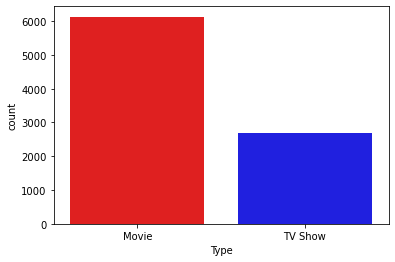

In [394]:
sns.countplot(x='Type',data=data,palette=['red','blue'])

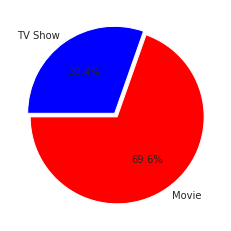

In [487]:
plt.pie(data['Type'].value_counts(), explode=(0.025,0.025), labels=data['Type'].value_counts().index, colors=['red','blue'],autopct='%1.1f%%', startangle=180);


### Top 5 countries with the highest number of TV shows produced

In [261]:
data[data['Type']=='TV Show']['Country'].value_counts().head(5)

United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Name: Country, dtype: int64

### All movies released in 2012

In [260]:
data[(data['Type']=='Movie') &  (data['Release_year']==2012)] 

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
46,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan","September 16, 2021",2012,R,115 min,Action & Adventure,Young CIA operative Matt Weston must get a dan...
204,s205,Movie,Kyaa Super Kool Hain Hum,Sachin Yardi,"Tusshar Kapoor, Riteish Deshmukh, Anupam Kher,...",India,"August 27, 2021",2012,TV-MA,136 min,"Comedies, International Movies",An aspiring actor and a struggling DJ team up ...
292,s293,Movie,Quartet,Dustin Hoffman,"Maggie Smith, Tom Courtenay, Billy Connolly, P...",United Kingdom,"August 8, 2021",2012,PG-13,98 min,"Comedies, Dramas, Independent Movies","To save their posh retirement home, former ope..."
308,s309,Movie,American Masters: Inventing David Geffen,Susan Lacy,David Geffen,United States,"August 4, 2021",2012,TV-MA,115 min,Movies,"The son of Jewish immigrants, David Geffen eme..."
383,s384,Movie,Department,Ram Gopal Varma,"Amitabh Bachchan, Sanjay Dutt, Rana Daggubati,...",India,"July 27, 2021",2012,TV-MA,143 min,"Action & Adventure, International Movies",Two cops form a task force to take down two mo...
...,...,...,...,...,...,...,...,...,...,...,...,...
8460,s8461,Movie,The Player,Ahmad El-Badri,"Ramez Galal, Emy Samir Ghanim, Edward Fouad, H...",Egypt,"June 20, 2019",2012,TV-MA,110 min,"Comedies, International Movies","To save his father’s company from bankruptcy, ..."
8497,s8498,Movie,The Sapphires,Wayne Blair,"Chris O'Dowd, Deborah Mailman, Jessica Mauboy,...",Australia,"April 26, 2019",2012,PG-13,99 min,"Comedies, Dramas, Independent Movies","Sisters Gail, Cynthia and Julie have talent, b..."
8639,s8640,Movie,Tukaram,Chandrakant Kulkarni,"Jitendra Joshi, Prateeksha Lonkar, Sharad Ponk...",India,"February 15, 2018",2012,TV-PG,162 min,"Dramas, Faith & Spirituality, International Mo...",A child whose innocence and devotion set him a...
8661,s8662,Movie,Unfinished Song,Paul Andrew Williams,"Terence Stamp, Gemma Arterton, Christopher Ecc...","United Kingdom, Germany","July 22, 2019",2012,PG-13,94 min,"Comedies, Dramas, Independent Movies","With his wife terminally ill, Arthur's future ..."


### The title of of all TV shows produced in Japan?

In [262]:
data[(data['Type']=='TV Show') &  (data['Country']=='Japan')]['Title'] 

76                                  Yowamushi Pedal
154                             Kuroko's Basketball
219                                      EDENS ZERO
265      Rascal Does Not Dream of Bunny Girl Senpai
291                                     SHAMAN KING
                           ...                     
7376                      Magi: Adventure of Sinbad
7588                                  Ninja Hattori
7627    Nura: Rise of the Yokai Clan: Demon Capital
7906                                Rurouni Kenshin
8277                     The Devil Is a Part-Timer!
Name: Title, Length: 169, dtype: object

###  Top 10 directors 

In [263]:
data['Director'].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: Director, dtype: int64

###  Bar Graph of number of TV shows and Movies releases since and including 2000

<AxesSubplot:title={'center':'Number of TV show and Movie releases'}, xlabel='Year', ylabel='Number of releases'>

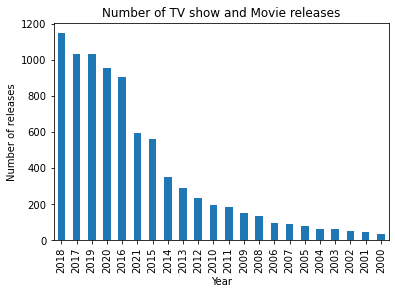

In [266]:
data_2000 = data[data['Release_year']>=2000]['Release_year'].value_counts()          # Counts the number of TV shows and Movies releases since and including 2000
data_2000.plot(kind='bar',xlabel='Year',ylabel='Number of releases',title='Number of TV show and Movie releases')

### Which year had the highest number of TV shows and Movies added to Netflix? Show with a Bar Graph.

In [401]:
data['Date_added'][0]    # The results in the 'Date_added' column inclued the month, day of month and year. We are interested in the year.
                         # To find the year we can use pd.to_datetime

Timestamp('2021-09-25 00:00:00')

In [402]:
data['Date_added'] = pd.to_datetime(data['Date_added']) # Now the data in the column 'Date_added' is of the form of a to_datetime

In [403]:
data['Date_added'][0].year # The .year method gives us the year

2021

In [404]:
data['Date_added'].dt.year.value_counts()  # Counts the number of shows and TV shows added to Netflix each year. 

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: Date_added, dtype: int64

#### We observe that the amount of content added to Netflix in 2020 is lower than in 2019.

In [372]:
nineteen= data['Date_added'].dt.year.value_counts()[2019]  # Number of content added in 2019
twenty = data['Date_added'].dt.year.value_counts()[2020]   # Number of content added in 2020
content_percent = (((twenty/nineteen)*100) -100)           # Percentage change in content added in 2019 and 2020
round(content_percent)

-7

#### We find that the quantity of content added to Nexflix in 2020 is 7% lower than in 2019. 

<AxesSubplot:title={'center':'Added to Netflix'}, xlabel='Year', ylabel='Number of TV shows and Movies'>

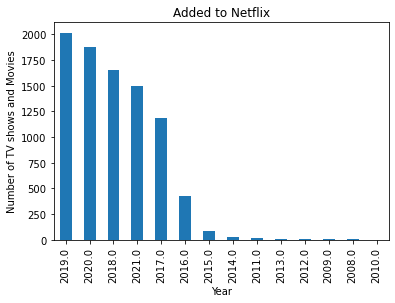

In [367]:
data['Date_added'].dt.year.value_counts().plot(kind='bar',xlabel='Year',ylabel='Number of TV shows and Movies', title='Added to Netflix')

#### Looking at the Bar Graph above we see that in year 2016 onwards a large number of TV shows and Movies were added to Netflix.

<AxesSubplot:xlabel='Date_added'>

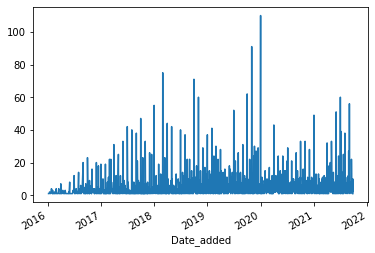

In [366]:
data[data['Date_added'] > pd.Timestamp(2016, 1, 1)].groupby('Date_added').size().plot(kind="line")   # Here we produced a line plot to take a closer look at the years 2016 onwards.

### Title of all movies that are comedies or created in the United Kingdom


In [281]:
data[(data['Type']=='Movie') & (data['Listed_in']=='Comedies')  |  (data['Country']=='United Kingdom') ]['Title']

8                The Great British Baking Show
27                                   Grown Ups
32                               Sex Education
65                                Numberblocks
72      Jack Whitehall: Travels with My Father
                         ...                  
8740                               Wild Alaska
8741                               Wild Arabia
8744                                  Williams
8758                    World's Busiest Cities
8786                              You Can Tutu
Name: Title, Length: 521, dtype: object

###  Ratings defined by Netflix

In [282]:
data['Rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [288]:
data['Rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
84 min         1
74 min         1
66 min         1
Name: Rating, dtype: int64

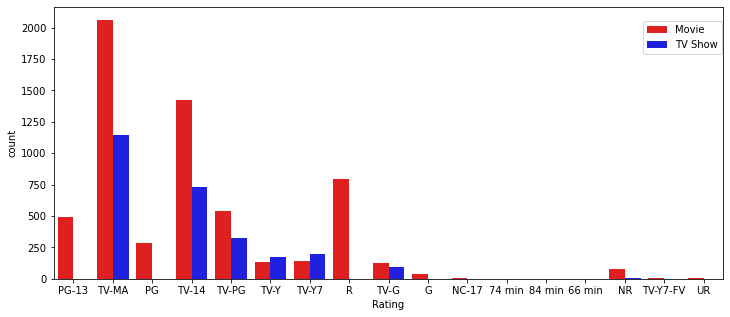

In [357]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='Rating',data=data, hue='Type',palette=['red','blue'])
plt.legend(bbox_to_anchor=(0.88, 0.95), loc=2, borderaxespad=0.)

### Movies Listed_in as Dramas or TV Shows Listed_in as an Anime Series

In [344]:
data[  (data['Type']=='Movie') & (data['Listed_in']=='Dramas') | (data['Type']=='TV Show') & (data['Listed_in']=='Anime Series') ].head(10)

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
112,s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",NaN,2021-09-03,2021,PG-13,119 min,Dramas,"In the wake of the Sept. 11 attacks, a lawyer ..."
129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States",2021-09-01,2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...
142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States",2021-09-01,2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...
162,s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong",2021-09-01,2017,PG-13,118 min,Dramas,"This biopic of Thurgood Marshall, the first Bl..."
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2021-08-01,2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...
343,s344,Movie,My Girl,Howard Zieff,"Dan Aykroyd, Jamie Lee Curtis, Macaulay Culkin...",United States,2021-08-01,1991,PG-13,102 min,Dramas,This coming-of-age charmer follows a summer in...
376,s377,TV Show,Transformers: War for Cybertron: Kingdom,NaN,"Jake Foushee, Jason Marnocha, Linsay Rousseau,...",NaN,2021-07-29,2021,TV-Y7,1 Season,Anime Series,The frantic race to locate the Allspark first ...
426,s427,Movie,Cousins,"Ainsley Gardiner, Briar Grace-Smith","Rachel House, Briar Grace-Smith, Tanea Heke, T...",New Zealand,2021-07-22,2021,TV-MA,99 min,Dramas,"Separated as children, three cousins with an u..."
446,s447,Movie,The Book of Henry,Colin Trevorrow,"Naomi Watts, Jaeden Martell, Jacob Tremblay, S...",United States,2021-07-16,2017,PG-13,105 min,Dramas,An 11-year-old vows to help a new neighbor who...
599,s600,Movie,The Best of Enemies,Robin Bissell,"Taraji P. Henson, Sam Rockwell, Babou Ceesay, ...",United States,2021-07-01,2019,PG-13,133 min,Dramas,"In 1971, a summit on school integration in Nor..."


### To sort the dataset by Release_year

In [345]:
data.sort_values(by='Release_year', ascending=False)   # Here we sorted the Release_year in decending order

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,2021-06-02,2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,2021-06-04,2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,2021-06-04,2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,2021-06-04,2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,2017-03-31,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...


### Movie Durations

In [542]:
Movie_data= data[data['Type']=='Movie']   # This dataframe contains Movies only
Movie_data.head()  # This dataframe contains Movies only

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [538]:
Movie_data['Duration'].value_counts()      # Movie duration count

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
205 min      1
273 min      1
5 min        1
203 min      1
16 min       1
Name: Duration, Length: 205, dtype: int64

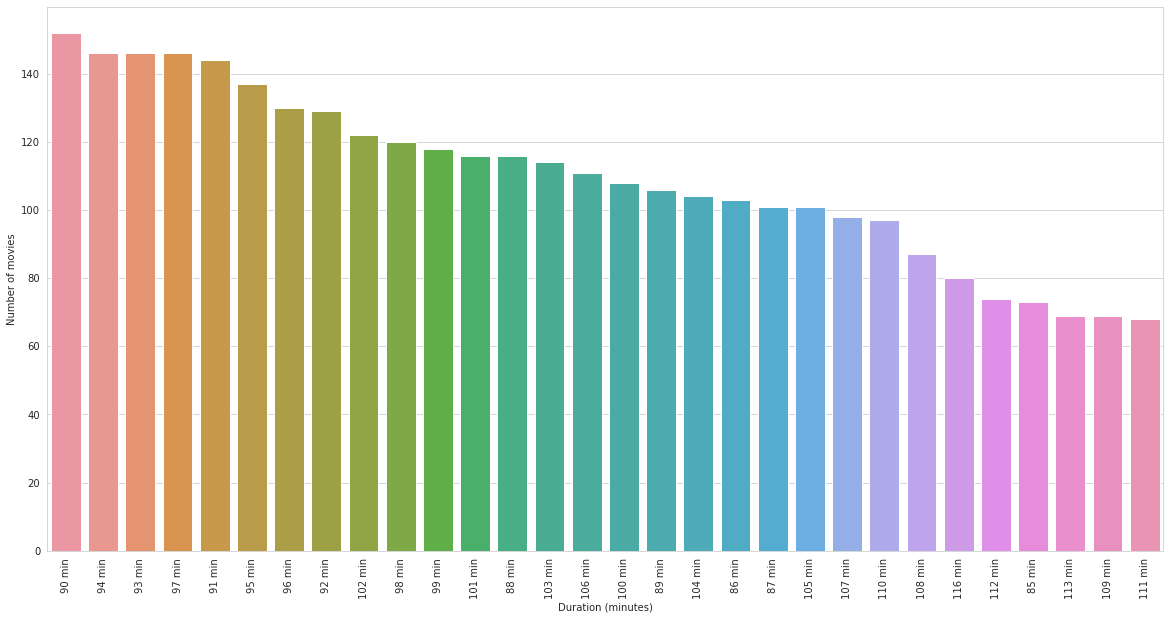

In [558]:
Movie_duration =Movie_data['Duration'].value_counts().head(30)   # There are 205 Movies in the dataset Movie_data. We will be looking at the top 30 movies with the longest duration. 
plt.figure(figsize=(20, 10));
sns.barplot(x = Movie_duration.index, y = Movie_duration);
plt.xticks(rotation=90);
plt.ylabel('Number of movies');
plt.xlabel ('Duration (minutes)');

 ###  Listed_in terms defined by Netflix

In [570]:
data['Listed_in'].unique()     

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [586]:
data['Listed_in'][1] # The Listed_in terms defined by Netflix are strings with commas. We want to split the Listed_in terms into several strings. 

'International TV Shows, TV Dramas, TV Mysteries'

In [580]:
Category= data['Listed_in'].str.split(', ',expand=True).stack()   # Here we slit the Listed_in terms whenever a comma appears.
Category

0     0               Documentaries
1     0      International TV Shows
      1                   TV Dramas
      2                TV Mysteries
2     0              Crime TV Shows
                     ...           
8805  0    Children & Family Movies
      1                    Comedies
8806  0                      Dramas
      1        International Movies
      2            Music & Musicals
Length: 19323, dtype: object

In [581]:
Category.value_counts().head(12)     # Here are the top 12 single string Listed_in terms.

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
dtype: int64

<AxesSubplot:xlabel='count'>

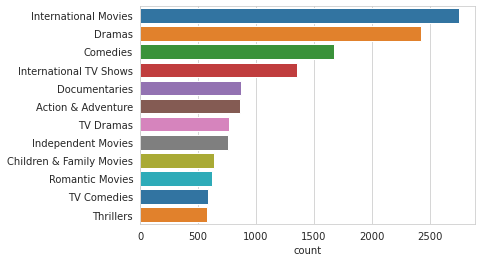

In [582]:
sns.countplot(y=Category,order= Category.value_counts().index[:12], palette='tab10')   # Here I set the index to 12 to plot the top 12 categories wih the highest value count.

### We observe that category with the highest content count on Netflix are International Movies. 

#### Top 10 countries with the highest number of Movies produced

In [5]:
data[data['Type']=='Movie']['Country'].value_counts().head(10)

United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Japan               76
Turkey              76
Name: Country, dtype: int64